# FINAL PROJECT

### OLEH NAVARIDHA TIRTA PERWITASARI
 Dataset yang digunakan merupakan Data Keuangan Cryptocurrency Historis Lengkap yang dapat diakses melalui alamat berikut https://www.kaggle.com/philmohun/cryptocurrency-financial-data

In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
import pylab as pl
import numpy as np
%matplotlib inline
df = pd.read_csv("D:\\digital talent\FinalProject_Dataset\\consolidated_coin_data.csv")
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,ripple,"Apr 24, 2019",0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293"
1,ripple,"Apr 23, 2019",0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875"
2,ripple,"Apr 22, 2019",0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301"
3,ripple,"Apr 21, 2019",0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430"
4,ripple,"Apr 20, 2019",0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592"


## Penjelasan
Dataset ini berisikan tentang data harga coin per hari yaitu harga di saat awal hari('Open'), harga tertinggi yang tercatat pada hari itu ('High'), harga terendah yang tercatat di hari itu ('Low') , nilai moneter dari mata uang yang diperdagangkan dalam 24 jam ('Volume'), serta data kapitalisasi pasar('Market Cap').

In [4]:
df.Date = pd.to_datetime(df.Date)
fl1 = df.Currency == 'ripple'
fl2 = df.Date.dt.year == 2019
dfl = df[fl1 & fl2]
dfl.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,ripple,2019-04-24,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293"
1,ripple,2019-04-23,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875"
2,ripple,2019-04-22,0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301"
3,ripple,2019-04-21,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430"
4,ripple,2019-04-20,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592"


In [5]:
cdfl = df[['Date','Open','High']]
cdfl.head()

,Date,Open,High
0,2019-04-24,0.321114,0.321282
1,2019-04-23,0.323844,0.328396
2,2019-04-22,0.322277,0.329350
3,2019-04-21,0.328678,0.329627
4,2019-04-20,0.331871,0.333213


## Scatter Plot masing-masing Features

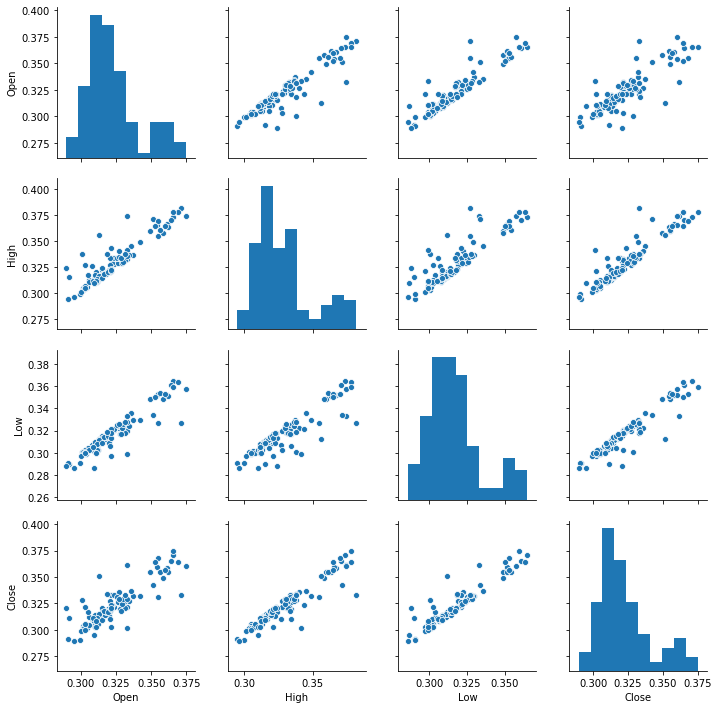

In [6]:
import seaborn as sns
sns.pairplot(dfl)

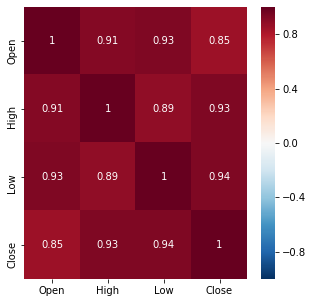

In [7]:
plt.figure(figsize=(5,5))
sns.heatmap(dfl.corr(),
            vmin=-1,
            cmap='RdBu_r',
            annot=True);

## Scatter Plot

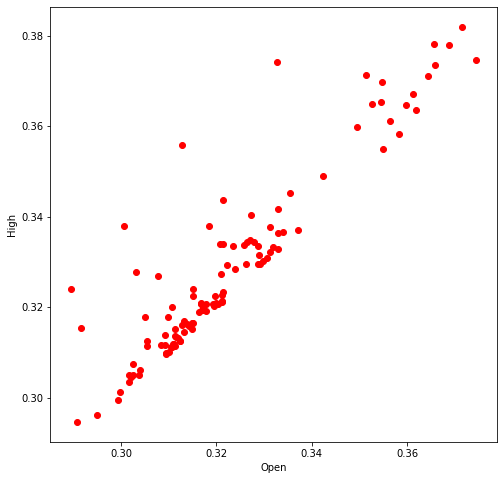

In [20]:
plt.figure(figsize=(8,8))
x_data, y_data = (dfl["Open"].values, dfl["High"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('High')
plt.xlabel('Open')
plt.show()

### Penjelasan

Dari beberapa Scatter Plot yang menunjukkan korelasi antar beberapa variabel, dengan menggunakan Seaborn hitmap kita dapat melihat korelasi yang paling sesuai, dalam data ini yaitu antara variabel "Open" dan "High" yang dimana variabel "Open" itu adalah harga awal pada hari itu dan "High" adalah harga tertinggi pada hari itu. Semakin tinggi harga awal yang ditentukan pada hari itu maka semakin tinggi pula tingkat harga tertinggi  yang didapat pada hari itu.

## Statistik Deskriptif

In [9]:
dfl.describe()

,Open,High,Low,Close
count,114.000000,114.000000,114.000000,114.000000
mean,0.322780,0.328944,0.316905,0.322344
std,0.018937,0.020610,0.017598,0.018774
min,0.289425,0.294617,0.285888,0.289558
25%,0.310757,0.313977,0.305958,0.310309
50%,0.318106,0.322416,0.314029,0.317605
75%,0.330421,0.336470,0.323937,0.329614
max,0.374505,0.381949,0.364756,0.375243


## Penjelasan
Dari dataset yang digunakan dalam project ini kita dapatkan statistik deskriptif yang menunjukkan nilai mean, standar deviasi, nilai maximun dan minimun, serta nilai kuartilnya di setiap variabelnya, variabel yang saya gunakan yaitu hanya variabel "Open" dan "High" yang memiliki korelasi cukup baik. Dapat dilihat dari data yang ditunjukkan diatas yaitu nilai mean dari variabel "Open" yaitu sebesar 0.322780 dan untuk variabel "High" yaitu sebesar 0.328944, nilai standar deviasi variabel "Open" adalah 0.018937 dan "High" adalah 0.020610, nilai minimum variabel "Open" yaitu 0.289425 dan "High" yaitu 0.294617, nilai maximum variabel "Open" yaitu 0.374505 dan "High" yaitu 0.381949, dan juga kita dapat mengetahui nilai kuartil atas, bawah dan nilai kuartil median.

## Analisis Model Regresi

In [10]:
msk = np.random.rand(len(dfl)) < 0.8
train = dfl[msk]
test = dfl[~msk]

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Open']])
train_y = np.asanyarray(train[['High']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.99708886]]
Intercept:  [0.00659832]


## Penjelasan
Dari Scatter Plot diatas dapat dilihat pola sebaran datanya dan diyakini bahwa korelasi data yang terbentuk yaitu berupa regresi linier.Dibawah ini merupakan model linear dari 2 variabel yang digunakan.

## Regresi Linear

Text(0, 0.5, 'High')

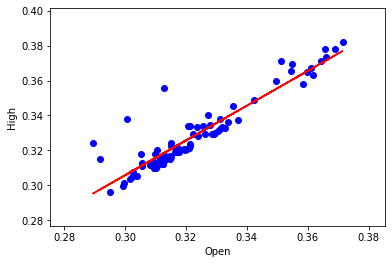

In [12]:
plt.scatter(train.Open, train.High,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Open")
plt.ylabel("High")

## Tingkat Keakuratan

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Open']])
test_y = np.asanyarray(test[['High']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 0.73


## K-Means Clustering
Dibawah ini adalah Cluster yang dibuat dari korelas antara varibel "Open" dan "High", dimana dibuat 3 cluster yang ditentukan dari grafik metode elbow yang terlihat menyiku, pada gambar sudut siku yaitu bernilai 3 sehingga dibuat 3 cluster.

In [12]:
X = dfl.iloc[:, [2, 3]].values

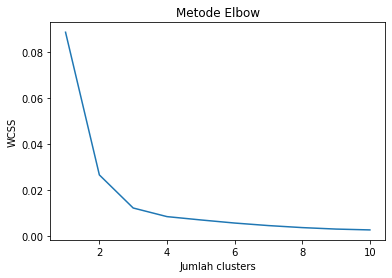

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

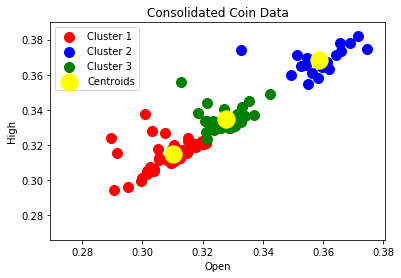

In [21]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consolidated Coin Data')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()
plt.show()